In [1]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from sklearn.utils.multiclass import unique_labels

from scipy import stats
from IPython.display import display, HTML

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix


In [2]:
#### read in the flattened dataframes with the labels for the 98 to 2015 data
MSFT_df_98_to_15_df = pd.read_csv(r"/Users/fahad/project_repo/data/external/MSFT_flat_98_to_2015.csv")
AAPL_df_98_to_15_df = pd.read_csv(r"/Users/fahad/project_repo/data/external/AAPL_flat_98_to_2015.csv")
AMZN_df_98_to_15_df = pd.read_csv(r"/Users/fahad/project_repo/data/external/AMZN_flat_98_to_2015.csv")

In [3]:
#vertically stack the MSFT and AAPL dataframes on top of eachother
df = pd.concat([MSFT_df_98_to_15_df, AAPL_df_98_to_15_df], axis=0)
#vertically stack the MSFT&AAPL df and the AMZN dataframe ontop of eachother
df = pd.concat([df,AMZN_df_98_to_15_df],axis = 0)

In [4]:
#drop the dates column
df = df.drop(['Unnamed: 0'], axis = 1)

y_train = df['Label']
#drop the labels from the instances
df = df.drop(['Label'], axis =1)
#assign the remaining columns in the dataframe
X_train = df



In [5]:
#list of gammas to try
gammas  = [0.001, 0.01, 0.1, 1]

#parameters for the grid search to optimise the SVM
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10], 'gamma':gammas}

#support vector machine object
svc = svm.SVC(gamma="scale")

In [6]:
#grid search function searches the space of parameters and optimises for the best possible score
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas, 'kernel':('linear','rbf')}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_


In [7]:
#returns the best params for the SVM object 
svc_param_selection(X_train,y_train, 5)

clf = svm.SVC(kernel="linear", C=10)

clf.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [8]:
#import the test dataframes and concatenate them to get the predictions using the svm 

###read in the flattened dataframes with the labels for 2015 to 2019
MSFT_df_15_to_19_df = pd.read_csv(r"/Users/fahad/project_repo/data/external/MSFT_flat_2015_2019.csv")
AAPL_df_15_to_19_df = pd.read_csv(r"/Users/fahad/project_repo/data/external/AAPL_flat_2015_2019.csv")
AMZN_df_15_to_19_df = pd.read_csv(r"/Users/fahad/project_repo/data/external/AMZN_flat_2015_2019.csv")

#concat the dataframes to create the X_test and y_test objects that we will evaluate the performance of our 
#optimised SVM on

df_2 = pd.concat([MSFT_df_15_to_19_df, AAPL_df_15_to_19_df], axis=0)
df_2 = pd.concat([df_2,AMZN_df_15_to_19_df],axis = 0)

#dates used to index the separate stocks which we will test on 

dates = df_2['Unnamed: 0']
df_2 = df_2.drop(['Unnamed: 0'], axis = 1)

y_test = df_2.Label
df_2 = df_2.drop(['Label'], axis=1)


In [9]:
X_test = df_2

In [10]:
y_pred = clf.predict(X_test)
y_pred = y_pred.tolist()

In [11]:
from sklearn.metrics import accuracy_score
print ("saved model acc: %s" % accuracy_score(y_test, y_pred))
# accuracy: (tp + tn) / (p + n)

# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, y_pred)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, y_pred)
print('ROC AUC: %f' % auc)

saved model acc: 0.8133333333333334
Precision: 0.796296
Recall: 0.934783
F1 score: 0.860000
Cohens kappa: 0.585308
ROC AUC: 0.777736


In [12]:
%matplotlib inline

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title="Confusion Matrix",
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype("float")/ cm.sum(axis=1)[:,np.newaxis]
        print ("Normalised confusion matrix")
    else:
        print ("Confusion matrix, without normalisation")
        
    print (cm)
    
    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j, i, cm[i,j],
        horizontalalignment = "center",
        color="white" if cm[i,j] > thresh else "black" )
        
    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    

Confusion matrix, without normalisation
[[36 22]
 [ 6 86]]


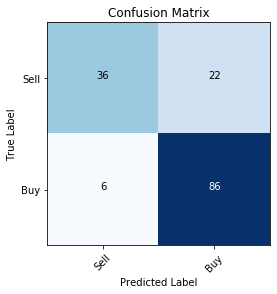

In [13]:
cm = confusion_matrix(y_test, y_pred)
cm_labels = ['Sell', 'Buy']
plot_confusion_matrix(cm, cm_labels, title="Confusion Matrix")

In [14]:
MSFT_dates = list(dates[:50])
MSFT_preds = list(y_pred[:50])

AAPL_dates = list(dates[51:100])
AAPL_preds = list(y_pred[51:100])

AMZN_dates = list(dates[100:])
AMZN_preds = list(y_pred[100:])

In [15]:
def pred_to_df(list_of_dates, list_of_preds):
    """takes a list of dates and a list of predictions for the dates and creates a dataframe object"""
    #dict to be transformed into df
    empty_dict = dict()
    for i in range(len(list_of_dates)):
        empty_dict[list_of_dates[i]] = [list_of_preds[i]]
        
    preds_df = pd.DataFrame.from_dict(empty_dict)
    preds_df = preds_df.T
    
    return preds_df

    

In [16]:
MSFT_df = pred_to_df(MSFT_dates,MSFT_preds)
AAPL_df = pred_to_df(AAPL_dates, AAPL_preds)
AMZN_df = pred_to_df(AMZN_dates, AMZN_preds)



In [17]:
export_predictions  = MSFT_df.to_csv('MSFT_15_19_preds_1d_SVM_binary.csv')
export_predictions_two  = AAPL_df.to_csv('AAPL_15_19_preds_1d_SVM_binary.csv')
export_predictions_three = AMZN_df.to_csv('AMZN_15_19_preds_1d_SVM_binary.csv')

In [18]:
export_X_train = X_train.to_csv("X_train_98_15.csv")
export_y_train = y_train.to_csv("y_train_98_15.csv")
export_X_test = X_test.to_csv("X_test_98_15.csv")

/Users/fahad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  
